In [1]:
import numpy as np
import pandas as pd
df = pd.read_excel("life_data.xlsx")
df.columns


def pearson_correlation(x, y):
    # 입력 변수 x와 y의 길이가 동일한지 확인
    if len(x) != len(y):
        raise ValueError("두 변수는 길이가 동일해야 합니다.")

    n = len(x)  # 변수의 개수

    # 평균 계산
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    # 분자 계산
    numerator = sum((x - mean_x) * (y - mean_y))

    # 분모 계산
    denominator = np.sqrt(sum((x - mean_x)**2) * sum((y - mean_y)**2))

    # 피어슨 상관계수 계산
    correlation = numerator / denominator

    return correlation

# 예시 데이터


label_name = '주거환경만족도'
cols = [ '의료시설 수', '대중교통만족도', '문화시설 수', '경제력', '주택가격 안정화지수', '1인당 녹지 면적', '전체녹지', '상업시설 수', '주거환경만족도']

for i in range(len(cols)):
    x = df[cols[i]]
    y = df[label_name]
    correlation_coefficient = pearson_correlation(x, y)
    print("피어슨 상관계수","(",cols[i],"):", correlation_coefficient)


피어슨 상관계수 ( 의료시설 수 ): -0.22118048241224303
피어슨 상관계수 ( 대중교통만족도 ): -0.024585098862924027
피어슨 상관계수 ( 문화시설 수 ): -0.08326167148777945
피어슨 상관계수 ( 경제력 ): -0.04180423063953908
피어슨 상관계수 ( 주택가격 안정화지수 ): -0.07884179043161774
피어슨 상관계수 ( 1인당 녹지 면적 ): 0.02193903637970422
피어슨 상관계수 ( 전체녹지 ): -0.13763641573897403
피어슨 상관계수 ( 상업시설 수 ): 0.10323444634398407
피어슨 상관계수 ( 주거환경만족도 ): 1.0


In [2]:
df = pd.DataFrame(df)
df_a = df.iloc[:,2:]
df_a

,의료시설 수,대중교통만족도,문화시설 수,경제력,주택가격 안정화지수,1인당 녹지 면적,전체녹지,상업시설 수,주거환경만족도
0,2302,6.29,12,424.83588,0.750268,26.684098,1440374,2249993,5.97
1,2343,6.60,12,452.95609,0.107991,26.890935,797721,2320955,6.10
2,2369,6.41,13,465.72573,9.600863,26.963048,797721,2320955,5.56
3,2407,6.29,13,491.73068,0.954654,26.990000,797721,2320955,5.89
4,2452,6.98,13,524.59345,2.650602,26.310000,797721,2320955,5.97
...,...,...,...,...,...,...,...,...,...
270,490,6.36,9,38.03053,1.026694,18.930000,187309,2937285,6.16
271,491,3.34,9,39.38464,1.829268,18.010000,187309,2937285,6.59
272,498,6.74,11,41.02403,4.191617,18.230000,187309,2937285,6.44
273,511,6.83,11,43.66141,0.957854,18.520000,187309,2937285,6.48


In [4]:
from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
font_path = "C:/Windows/Fonts/malgunsl.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

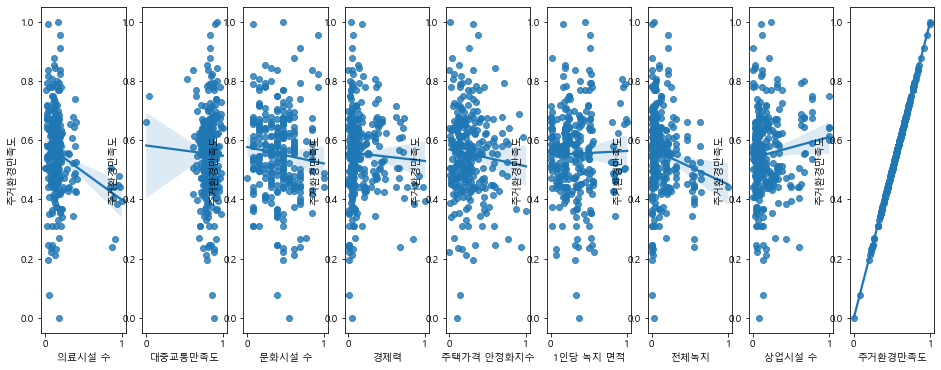

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# 데이터프레임 생성 코드가 누락되어 있다면 추가해주세요.

scaler = MinMaxScaler()
df_a_normalized = scaler.fit_transform(df_a)

df_a_normalized = pd.DataFrame(df_a_normalized, columns=df_a.columns)

plt.figure(figsize=(16, 6))
for i, name in enumerate(cols):
    ax = plt.subplot(1, 9, i+1)
    sns.regplot(x=name, y=cols[8], data=df_a_normalized, ax=ax, fit_reg=True)

plt.show()


[-0.35 -0.    0.03  0.14 -0.03  0.05  0.02]
0.57
오차율:  0.11755596626849499
회귀 계수 (가중치):
의료시설 수: -0.35
대중교통만족도: -0.00
문화시설 수: 0.03
경제력: 0.14
주택가격 안정화지수: -0.03
1인당 녹지 면적: 0.05
전체녹지: 0.02


IndexError: index 6 is out of bounds for axis 0 with size 6

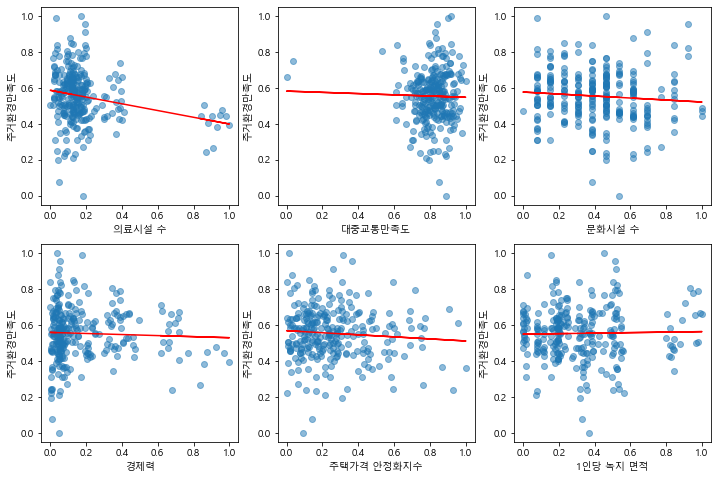

In [10]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

x_data = df_a_normalized[cols[:7]]
y_data = df_a_normalized['주거환경만족도']
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

print(np.round(lr.coef_, 2))
print(np.round(lr.intercept_, 2))
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, test_pred))
print("오차율: ",rmse)

print("회귀 계수 (가중치):")
for i, col in enumerate(cols[:7]):
    print("{}: {:.2f}".format(col, lr.coef_[i]))

x_data = df_a_normalized[cols[:7]]
y_data = df_a_normalized['주거환경만족도']

# Create subplots for each feature
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

# Plot scatter plots with linear regression line for each feature
for i, col in enumerate(x_data.columns):
    ax = axes[i]
    ax.scatter(x_data[col], y_data, alpha=0.5)
    ax.set_xlabel(col)
    ax.set_ylabel('주거환경만족도')

    # Fit linear regression line
    lr = LinearRegression()
    lr.fit(x_data[[col]], y_data)
    y_pred = lr.predict(x_data[[col]])
    ax.plot(x_data[col], y_pred, color='red')

plt.tight_layout()
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 49444 (\N{HANGUL SYLLABLE SEOL}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\a

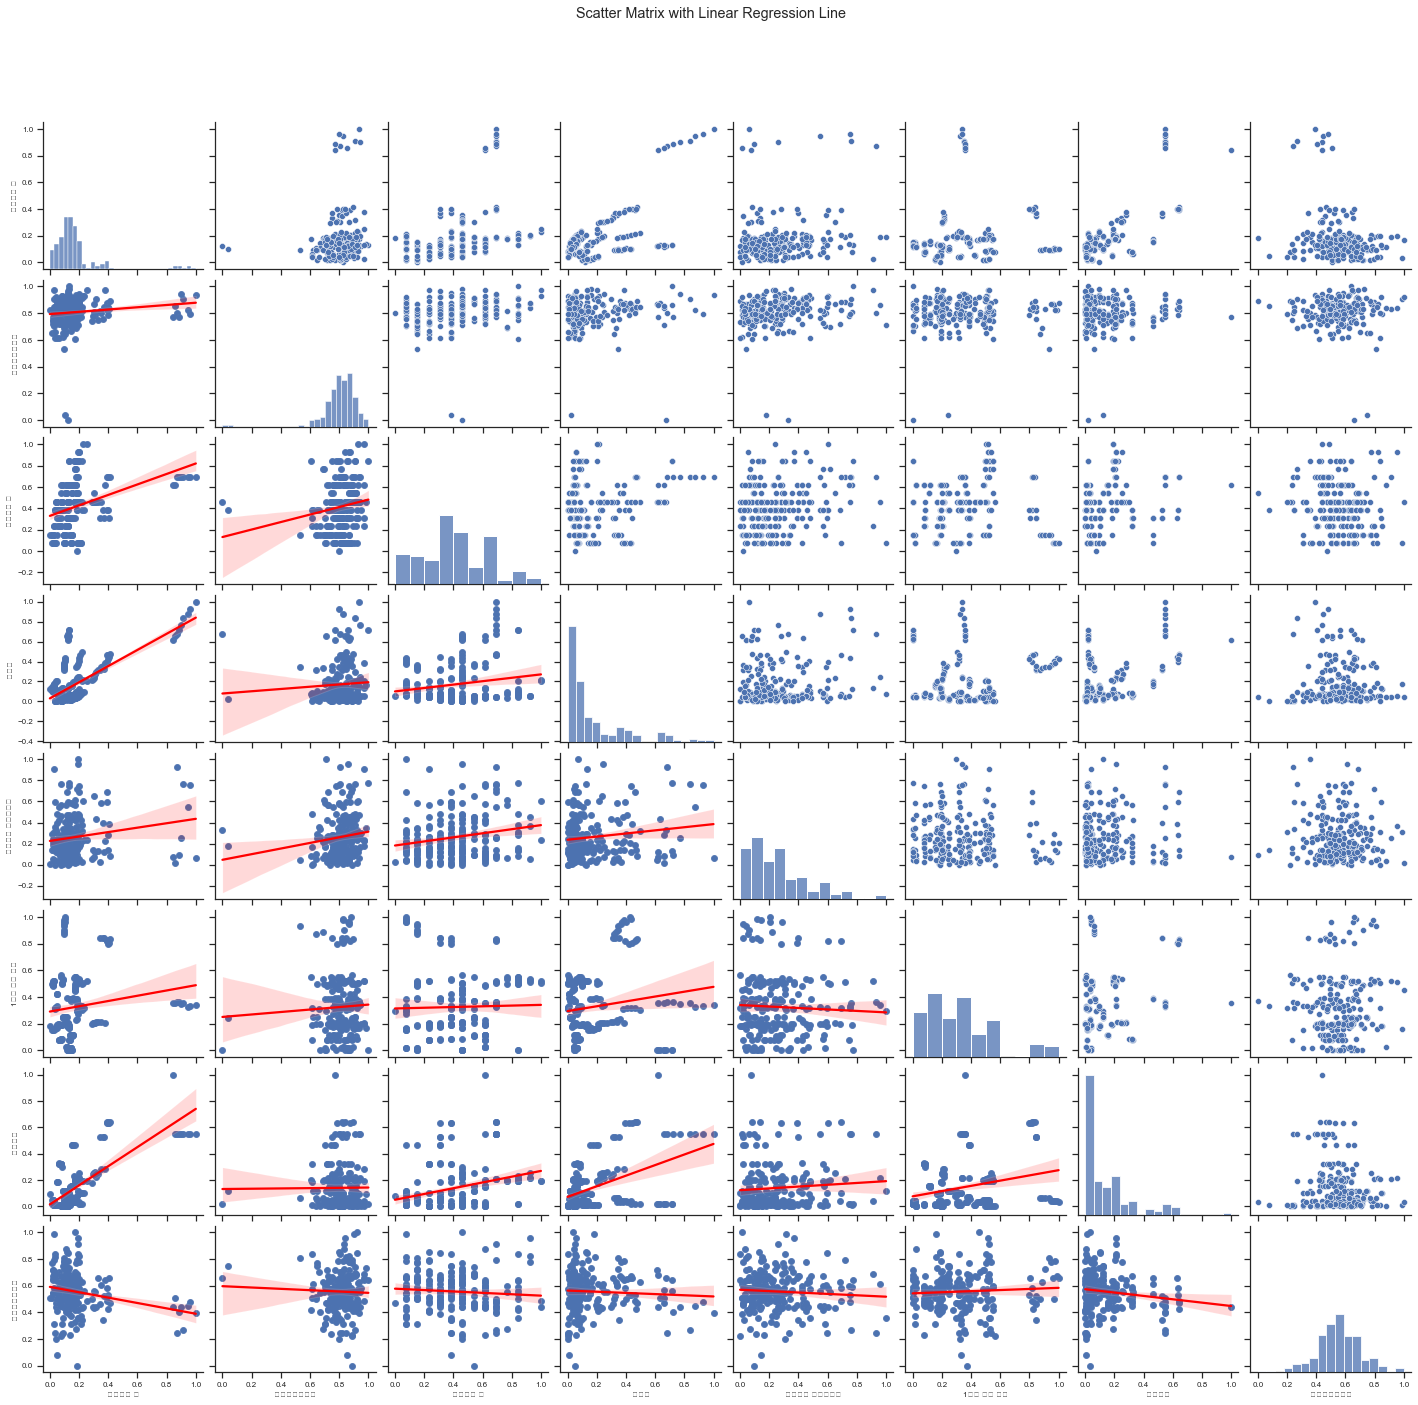

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with the features and target variable
df_plot = X_train.copy()
df_plot['주거환경만족도'] = y_train

# Set the style and font size
sns.set(style="ticks", rc={"axes.labelsize": 8, "xtick.labelsize": 8, "ytick.labelsize": 8})

# Create scatter matrix plot with linear regression line
g = sns.pairplot(df_plot, diag_kind='hist')
g.map_lower(sns.regplot, line_kws={'color': 'red'})

# Customize the plot

g.fig.suptitle('Scatter Matrix with Linear Regression Line')
plt.subplots_adjust(top=0.9)

# Show the plot
plt.show()

Polynomial Regression Coefficients:
[ 7.94503344e+12  1.14200000e+02  1.06600000e+01 -1.37800000e+01
 -4.10200000e+01  1.48600000e+01  5.58500000e+01 -8.56900000e+01
 -4.37200000e+01 -1.46790000e+02 -6.14500000e+01 -4.89000000e+00
 -2.57400000e+01 -2.24730000e+02  8.26800000e+01 -8.26000000e+00
  2.46800000e+01  7.77600000e+01 -2.55000000e+01 -7.57000000e+01
  1.26790000e+02  2.26800000e+01 -2.04600000e+01 -1.52400000e+01
  2.00000000e+00  1.39700000e+01  4.63400000e+01  2.74600000e+01
  9.51400000e+01 -1.33670000e+02 -1.05300000e+01 -9.28000000e+00
  6.81100000e+01 -6.04700000e+01  3.66500000e+01  1.47510000e+02
 -1.89390000e+02 -3.80200000e+01  1.53590000e+02  1.47700000e+01
 -3.18900000e+01  2.03060000e+02  3.52530000e+02  3.02600000e+01
  8.38900000e+01  2.74550000e+02  4.33400000e+01  1.99360000e+02
 -2.65730000e+02 -4.15500000e+01 -2.31190000e+02  2.15200000e+01
 -6.85900000e+01  1.37040000e+02  1.16000000e+00 -5.41000000e+00
 -3.54630000e+02 -8.54000000e+00 -6.78000000e+00 -3.62

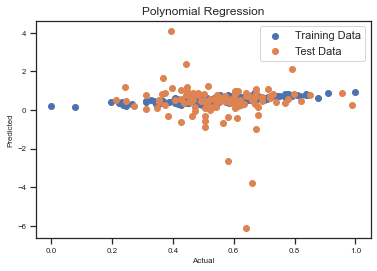

In [43]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt

x_data = df_a_normalized[cols[:7]]
y_data = df_a_normalized['주거환경만족도']
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=42)

# Generate polynomial features
degree = 3  # Set the degree of the polynomial
poly = PolynomialFeatures(degree=degree, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

pr = LinearRegression()
pr.fit(X_train_poly, y_train)

print("Polynomial Regression Coefficients:")
print(np.round(pr.coef_, 2))
print("Intercept:", np.round(pr.intercept_, 2))

# Predict on the training set
pred_train = pr.predict(X_train_poly)

# Predict on the test set
pred_test = pr.predict(X_test_poly)

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))
print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)

# Plotting
plt.scatter(y_train, pred_train, label='Training Data')
plt.scatter(y_test, pred_test, label='Test Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.title('Polynomial Regression')
plt.show()


InvalidIndexError: (slice(None, None, None), None)

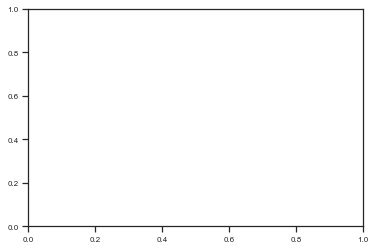

In [45]:
plt.scatter(pred,y_test, label='트레이닝 데이터')
plt.plot(X_test,pred, label='linear fit', linestyle='--')
plt.plot(X_test_poly, pred_test, label='quadratic fit')
plt.legend(loc=2)
plt.show()
